In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# afaire si fichier sample pas cree
df = pd.read_csv('df_feats.csv', index_col=0)
from sklearn.model_selection import train_test_split
from collections import Counter

df_sample, _ = train_test_split(df, train_size=1500, stratify=df.TARGET, random_state=1944)

print('df', Counter(df.TARGET))
print('df_sample', Counter(df_sample.TARGET))

#df_sample.to_csv('df_feats_sample.csv')

df Counter({0: 282682, 1: 24824})
df_sample Counter({0: 1379, 1: 121})


In [15]:
df_sample = pd.read_csv('df_feats_sample.csv', index_col=0)

In [4]:
import pickle

with open('lgbmc10_GridCV.p', 'rb') as f2:
    grid_lgbm = pickle.load(f2)


In [16]:
df_sample_target = df_sample.TARGET
df_sample.drop(columns='TARGET', inplace=True)
df.drop(columns='TARGET', inplace=True)

# SHAP pour interpreter resultat
https://towardsdatascience.com/one-feature-attribution-method-to-supposedly-rule-them-all-shapley-values-f3e04534983d

https://towardsdatascience.com/demystify-your-ml-model-with-shap-fc191a1cb08a

https://towardsdatascience.com/lime-vs-shap-which-is-better-for-explaining-machine-learning-models-d68d8290bb16

https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

https://medium.com/dataman-in-ai/explain-your-model-with-lime-5a1a5867b423

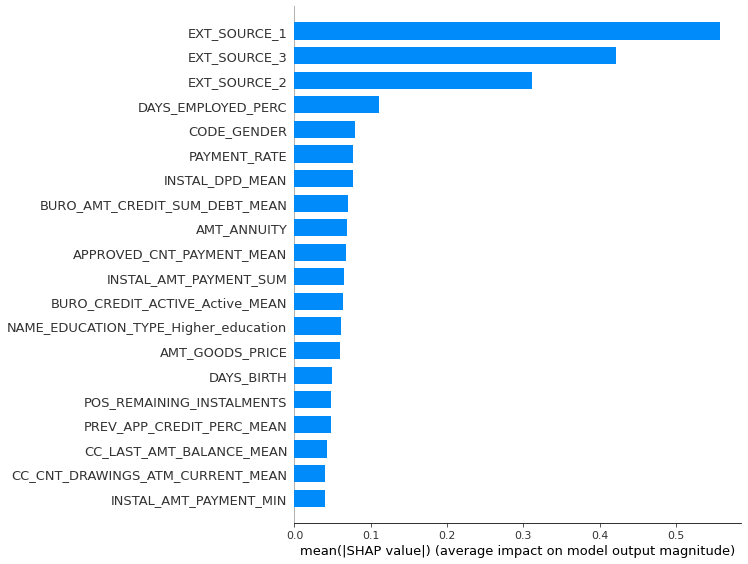

In [17]:
# conda install -c conda-forge shap
import shap

explainer_shap = shap.TreeExplainer(grid_lgbm)

shap_values_lgb = explainer_shap.shap_values(df_sample)
shap_values_lgb_df = explainer_shap.shap_values(df)

shap.summary_plot(shap_values_lgb[1], df, plot_type="bar")

In [18]:
explainer_shap.expected_value[1]

-0.0004974982472664461

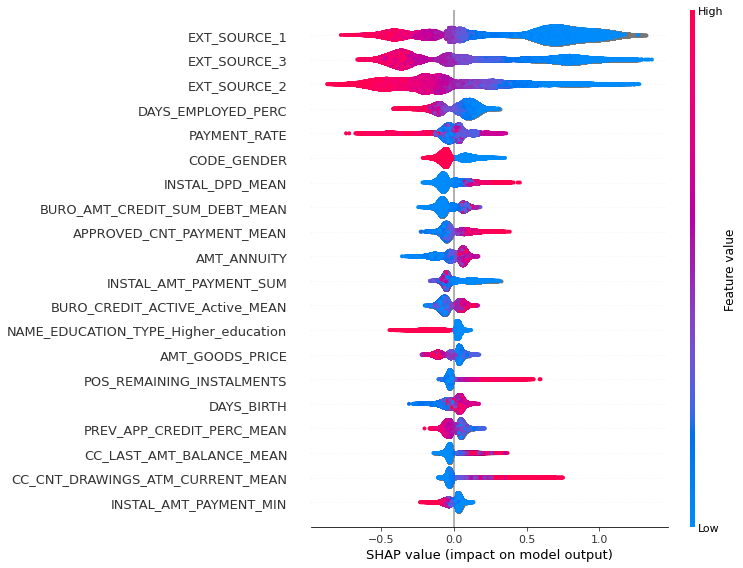

In [21]:
f = plt.figure()
shap.summary_plot(shap_values_lgb_df[1], df)
f.savefig("summary_plot_lgbm.png", bbox_inches='tight', dpi=150)

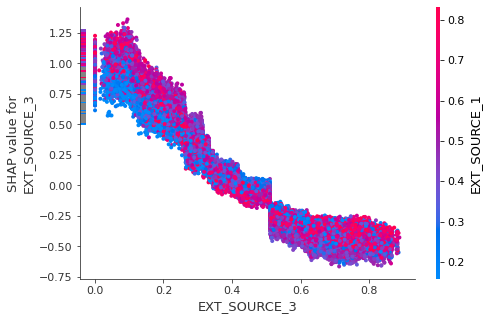

In [22]:
import shap
# make plot.
shap.dependence_plot('EXT_SOURCE_3', shap_values_lgb_df[1], df)

# essai visualisation

In [23]:
index1500 = [i for i in range(0,1500)]

In [24]:
df_sample.index = index1500
df_sample_target.index = index1500

In [25]:
df_sample.iloc[df_sample[df_sample.SK_ID_CURR==251896].index,:]

,SK_ID_CURR,POS_SK_DPD_DEF_SUM,CC_DRAWING_LIMIT_RATIO_MAX,INSTAL_PAYMENT_RATIO_MEAN,POS_REMAINING_INSTALMENTS,CC_LAST_AMT_BALANCE_MEAN,CC_PAYMENT_DIV_MIN_MIN,CC_LATE_PAYMENT_VAR,NEW_DOC_KURT,PREV_SK_ID_PREV_NUNIQUE,...,BURO_CREDIT_TYPE_Mortgage_MEAN,AMT_GOODS_PRICE,APPROVED_CNT_PAYMENT_MEAN,FLAG_DOCUMENT_7,FLAG_DOCUMENT_18,NONLIVINGAPARTMENTS_MEDI,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,ORGANIZATION_TYPE_Construction,INSTAL_AMT_PAYMENT_MIN,BURO_AMT_CREDIT_SUM_DEBT_MEAN
35,251896,0.0,NaN,1.0,2.0,NaN,NaN,NaN,20.0,1.0,...,0.0,445500.0,10.0,0,0,NaN,NaN,0,3456.99,48397.5


In [26]:
pd.DataFrame(shap_values_lgb[1]).to_csv('feats_sample_shap_values_lgb.csv')

### essai avec target == 1

In [27]:
d_feats = pd.read_csv('feats_sample_shap_values_lgb.csv', index_col=0)

In [29]:
i=df_sample[df_sample.SK_ID_CURR==100558].index.values[0]
print(i)
shap.initjs()
#shap.force_plot(explainer_shap.expected_value[1], shap_values_lgb[1][i], df_sample.iloc[i,:])
shap.force_plot(explainer_shap.expected_value[1], d_feats.loc[i].values, df_sample.iloc[i,:])


250


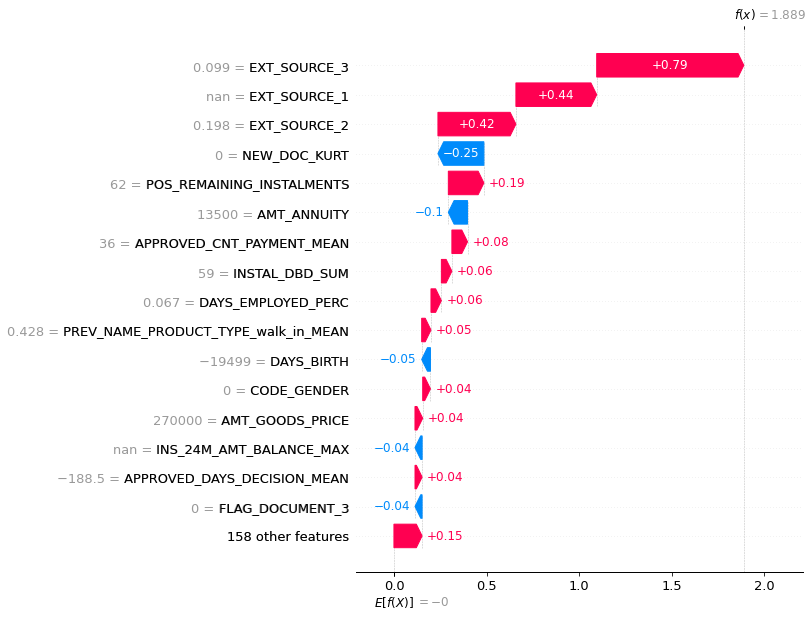

In [30]:
class ShapObject:
    
    def __init__(self, base_values, data, values, feature_names):
        self.base_values = base_values # Single value
        self.data = data # Raw feature values for 1 row of data
        self.values = values # SHAP values for the same row of data
        self.feature_names = feature_names # Column names
        
shap_object = ShapObject(base_values = explainer_shap.expected_value[1],
                         values = d_feats.loc[i].values,
                         feature_names = df_sample.columns,
                         data = df_sample.iloc[i,:])

shap.waterfall_plot(shap_object, max_display=17)

In [32]:
df_shap = pd.DataFrame(shap_object.values,shap_object.feature_names)

In [33]:
df_shap.columns = ["shap_values"]

In [34]:
df_shap[['shap_abs']] = np.abs(df_shap.shap_values)

In [35]:
df_shap.sort_values(by='shap_abs', ascending=False).head(17)

,shap_values,shap_abs
EXT_SOURCE_3,0.794318,0.794318
EXT_SOURCE_1,0.436162,0.436162
EXT_SOURCE_2,0.420987,0.420987
NEW_DOC_KURT,-0.248102,0.248102
POS_REMAINING_INSTALMENTS,0.191979,0.191979
AMT_ANNUITY,-0.103685,0.103685
APPROVED_CNT_PAYMENT_MEAN,0.084497,0.084497
INSTAL_DBD_SUM,0.056759,0.056759
DAYS_EMPLOYED_PERC,0.056149,0.056149
PREV_NAME_PRODUCT_TYPE_walk_in_MEAN,0.050163,0.050163


In [36]:
explainer_shap.expected_value[1]

-0.0004974982472664461

### essai avec target == 0

In [37]:
i=32

shap.initjs()
shap.force_plot(explainer_shap.expected_value[1], shap_values_lgb[1][i], df_sample.iloc[i,:])

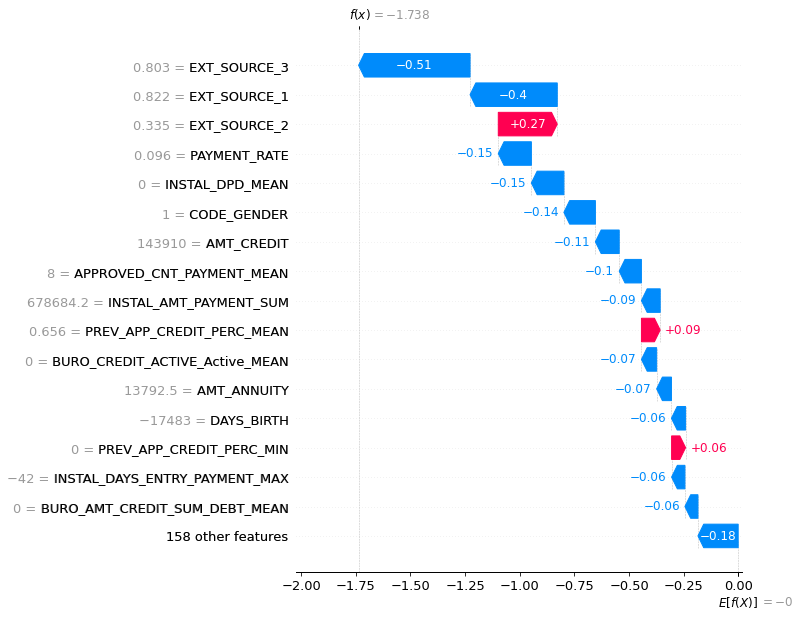

In [38]:
class ShapObject:
    
    def __init__(self, base_values, data, values, feature_names):
        self.base_values = base_values # Single value
        self.data = data # Raw feature values for 1 row of data
        self.values = values # SHAP values for the same row of data
        self.feature_names = feature_names # Column names
        
shap_object = ShapObject(base_values = explainer_shap.expected_value[1],
                         values = shap_values_lgb[1][i],
                         feature_names = df_sample.columns,
                         data = df_sample.iloc[i,:])

shap.waterfall_plot(shap_object, max_display=17)

### sauvegarde modele shapley pour dashboard

In [39]:
# afaire si shapvalues pas enregistre
with open('feats_sample_explainer_shap.p', 'wb') as f4:
    pickle.dump(explainer_shap, f4)

with open('feats_sample_shap_values_lgb.p', 'wb') as f4:
    pickle.dump(shap_values_lgb[1], f4)

In [40]:
pd.DataFrame(shap_values_lgb[1]).to_csv('feats_sample_shap_values_lgb.csv')